# DESI DR1 BHBs

https://data.desi.lbl.gov/doc/releases/dr1/vac/mws-bhb/

Do a very simple reprocessing of the data into internal formats

In [467]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import astropy.units as u


In [ ]:
import numpy as np
from astropy.coordinates import (
    BaseCoordinateFrame,
    frame_transform_graph,
    Galactic,
    StaticMatrixTransform,
    RepresentationMapping
)
from astropy.coordinates.matrix_utilities import rotation_matrix
from astropy.coordinates.representation import SphericalRepresentation

from astropy.coordinates import frame_transform_graph

class MyCustomFrame(BaseCoordinateFrame):
    default_representation = SphericalRepresentation
    frame_specific_representation_info = {
        SphericalRepresentation: [
            RepresentationMapping('lon', 'lon'),
            RepresentationMapping('lat', 'lat'),
            RepresentationMapping('distance', 'distance')
        ]
    }

R = np.array([
    [ 0.19255294, -0.84686636, -0.49572243],
    [-0.03789266, -0.51121616,  0.85861644],
    [-0.9805547 , -0.14654488, -0.13052619]
])

@frame_transform_graph.transform(StaticMatrixTransform, Galactic, MyCustomFrame)
def galactic_to_mycustom():
    return R


-1.6838142818593838 -17.784788439273257


In [498]:
polepos = SkyCoord(l=180.*u.deg,b=-90.*u.deg, frame='galactic')
polepos_icrs = polepos.transform_to(coord.icrs)
polepos_icrs_str = f"{polepos_icrs.ra.deg:.6f} {polepos_icrs.dec.deg:.6f}"
print(f"(l,b) Pole position in ICRS: {polepos_icrs_str}")

polepos = SkyCoord(ra=180.*u.deg,dec=-90.*u.deg, frame='icrs')
polepos_gal = polepos.transform_to(coord.galactic)
polepos_gal_str = f"{(polepos_gal.l.deg - 360.):.6f} {polepos_gal.b.deg:.6f}"
print(f"(ra,dec) Pole position in galactic: {polepos_gal_str}")

# what would this be in Magellanic coordinates?
# Define some coordinates in Galactic
c_gal = SkyCoord(l=(polepos_gal.l.deg)*u.deg, b=polepos_gal.b.deg*u.deg, frame='galactic')

# Transform to your custom frame
c_custom = c_gal.transform_to(MyCustomFrame())

print(f"(ra, dec) Pole position in Magellanic: {c_custom.lon.deg-360.} {c_custom.lat.deg}")

(l,b) Pole position in ICRS: 12.859478 -27.128252
(ra,dec) Pole position in galactic: -57.068075 -27.128252
(ra, dec) Pole position in Magellanic: -1.6838142818593838 -17.784788439273257


In [ ]:
# Open the FITS file
#hdul = fits.open('../data/observations/DESI_DR1/MWS_BHB.fits')
hdul = fits.open("https://data.desi.lbl.gov/public/dr1/vac/dr1/mws-bhb/v1.0/MWS_BHB.fits",use_fsspec=True)
# Print the structure of the FITS file
hdul.info()

Filename: <class 'fsspec.implementations.http.HTTPFile'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  RVTAB         1 BinTableHDU     92   6327R x 37C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, 2A, D, D, K, E, E, E, L, D, 6A, K, 7A, 6A, L]   
  2  FIBERMAP      1 BinTableHDU    224   6327R x 85C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E, K, K, K, K, K, K, K, K, K, K, K, K, K, E, E, E, D, D]   
  3  GAIA          1 BinTableHDU    324   6327R x 153C   [K, 28A, K, K, D, D, E, D, E, D, E, E, E, D, E, D, E, E, E, E, E, E, E, E, E, E, E, I, I, I, I, E, E, E, E, I, L, E, E, E, E, E, E, E, E, I, I, E, I, I, I, E, E, I, I, E, E, E, E, E, E, E, E, E, L, I, D, E, E, E, I, D, E, E, E, I, D, E, E, E, E, I, I, I, I, I, E, E, E, E, E, I,

In [331]:
hdul[1].columns;hdul[2].columns;hdul[3].columns

ColDefs(
    name = 'SOLUTION_ID'; format = 'K'
    name = 'DESIGNATION'; format = '28A'
    name = 'SOURCE_ID'; format = 'K'
    name = 'RANDOM_INDEX'; format = 'K'
    name = 'REF_EPOCH'; format = 'D'; unit = 'yr'
    name = 'RA'; format = 'D'; unit = 'deg'
    name = 'RA_ERROR'; format = 'E'
    name = 'DEC'; format = 'D'; unit = 'deg'
    name = 'DEC_ERROR'; format = 'E'
    name = 'PARALLAX'; format = 'D'; unit = 'mas'
    name = 'PARALLAX_ERROR'; format = 'E'
    name = 'PARALLAX_OVER_ERROR'; format = 'E'
    name = 'PM'; format = 'E'
    name = 'PMRA'; format = 'D'; unit = 'mas  yr^-1'
    name = 'PMRA_ERROR'; format = 'E'
    name = 'PMDEC'; format = 'D'; unit = 'mas  yr^-1'
    name = 'PMDEC_ERROR'; format = 'E'
    name = 'RA_DEC_CORR'; format = 'E'
    name = 'RA_PARALLAX_CORR'; format = 'E'
    name = 'RA_PMRA_CORR'; format = 'E'
    name = 'RA_PMDEC_CORR'; format = 'E'
    name = 'DEC_PARALLAX_CORR'; format = 'E'
    name = 'DEC_PMRA_CORR'; format = 'E'
    name = 'DEC_PMD

In [463]:
# these are the suggested high-level purity cuts
main_sel = np.array(hdul[1].data['PRIMARY'])# & (np.array(hdul[1].data['RVS_WARN']) == 0) & (np.array(hdul[1].data['RR_SPECTYPE'])== 'STAR')

print(f'Total DESI: {main_sel.size}, selected DESI: {np.nansum(main_sel)}')

Total DESI: 6327, selected DESI: 5441


Text(0, 0.5, 'logg')

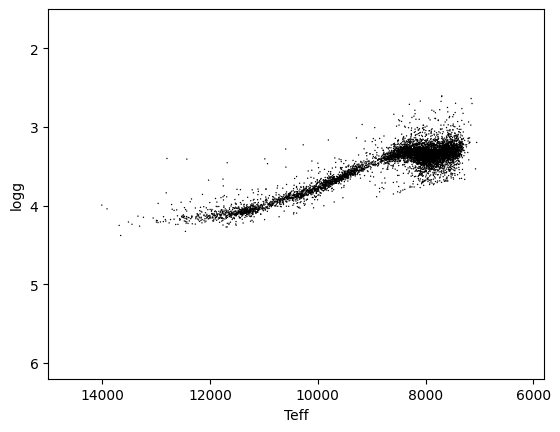

In [464]:
# validate against Bystrom et al. (2025)
plt.scatter(hdul[1].data['TEFF'], hdul[1].data['LOGG'], edgecolor='none', facecolor='black', s=1)
#plt.scatter(hdul[1].data['TEFF'], hdul[1].data['FEH'], edgecolor='none', facecolor='black', s=1)

# should compare directly to SDSS as well
plt.axis([15000,5800,6.2,1.5])
plt.xlabel('Teff')
plt.ylabel('logg')

# looks good! like Figure 1 from Bystrom et al. (2025)

In [465]:

# g-r is then
#gr = hdul[2]['FLUX_G'] - hdul[2]['FLUX_R']
#plt.scatter(hdul[2].data['ABS_MAG_G'], hdul[2].data['DIST'], edgecolor='none', facecolor='black', s=1)

# this has some weird substructure in it
#plt.scatter(hdul[1].data['TEFF'], hdul[2].data['DIST'], edgecolor='none', facecolor='black', s=1)

In [468]:
# get 6D data from the MWS BHB catalog


# Extract the necessary data from the FITS file
ra = hdul[3].data['RA'] * u.deg  # Right Ascension
dec = hdul[3].data['DEC'] * u.deg  # Declination
distance = hdul[2].data['DIST'] * u.kpc  # Distance in kpc

# Extract proper motion and radial velocity data
pm_ra = hdul[3].data['PMRA'] * u.mas / u.yr  # Proper motion in RA
pm_dec = hdul[3].data['PMDEC'] * u.mas / u.yr  # Proper motion in DEC
radial_velocity = hdul[1].data['VRAD'] * u.km / u.s  # Radial velocity

# Update the SkyCoord object with velocity information
coords = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra, pm_dec=pm_dec, radial_velocity=radial_velocity, frame='icrs')

# Convert to Galactocentric Cartesian coordinates with velocity
coords_cart = coords.transform_to(coord.Galactocentric)
coords_gal = coords.transform_to('galactic')

cartesian_coords = coords_cart.cartesian
cartesian_velocity = coords_cart.velocity


In [469]:
pm_ra_err = hdul[3].data['PMRA_ERROR'] * u.mas / u.yr
pm_dec_err = hdul[3].data['PMDEC_ERROR'] * u.mas / u.yr
rho = hdul[3].data['PMRA_PMDEC_CORR'] * u.kpc

pm_cov_eq = np.array([
    [pm_ra_err**2, rho * pm_ra_err * pm_dec_err],
    [rho * pm_ra_err * pm_dec_err, pm_dec_err**2]
])

In [470]:
from astropy.coordinates import SkyCoord
from astropy.units import mas, yr
import numpy as np

# Use a small step in proper motion
delta_pm = 1e-5 * mas/yr

# Original coord
coord = SkyCoord(ra=ra, dec=dec, distance=distance, 
                 pm_ra_cosdec=pm_ra, pm_dec=pm_dec, 
                 radial_velocity=radial_velocity, frame='icrs')

# Perturb in PMRA
coord_dpmra = SkyCoord(ra=ra, dec=dec, distance=distance,
                       pm_ra_cosdec=pm_ra + delta_pm, pm_dec=pm_dec,
                       radial_velocity=radial_velocity, frame='icrs')

# Perturb in PMDEC
coord_dpmdc = SkyCoord(ra=ra, dec=dec, distance=distance,
                       pm_ra_cosdec=pm_ra, pm_dec=pm_dec + delta_pm,
                       radial_velocity=radial_velocity, frame='icrs')

# Transform to galactic
g = coord.transform_to('galactic')
g_dpmra = coord_dpmra.transform_to('galactic')
g_dpmdc = coord_dpmdc.transform_to('galactic')

# Finite difference Jacobian (2x2)
J = np.array([
    [(g_dpmra.pm_l_cosb - g.pm_l_cosb)/delta_pm, (g_dpmdc.pm_l_cosb - g.pm_l_cosb)/delta_pm],
    [(g_dpmra.pm_b - g.pm_b)/delta_pm, (g_dpmdc.pm_b - g.pm_b)/delta_pm]
])


In [471]:
pm_cov_eq.shape

(2, 2, 6327)

In [472]:
pm_l_cosb_err = np.zeros(J.shape[2])
pm_b_err = np.zeros(J.shape[2])
pml_pmb_corr = np.zeros(J.shape[2])


for indx in range(0,J.shape[2]):
    jval = J[:,:,indx]
    pmval = pm_cov_eq[:,:,indx]
    pm_cov_gal = jval @ pmval @ jval.T
    pm_l_cosb_err[indx] = np.sqrt(pm_cov_gal[0,0])
    pm_b_err[indx] = np.sqrt(pm_cov_gal[1,1])
    pml_pmb_corr[indx] = pm_cov_gal[0,1] / (pm_l_cosb_err[indx] * pm_b_err[indx])


# coords_gal.pm_l_cosb,coords_gal.pm_b,pm_l_cosb_err,pm_b_err,pml_pmb_corr


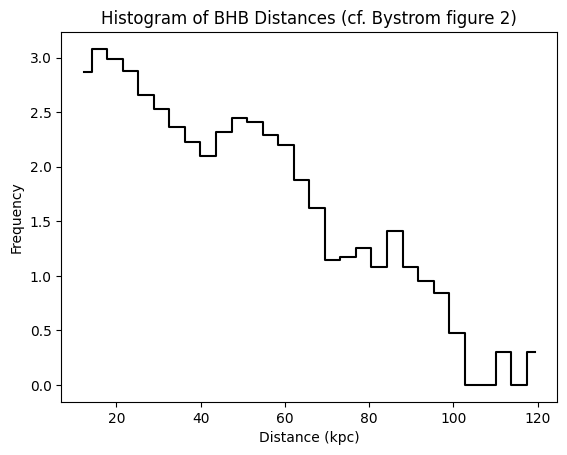

In [473]:
#plt.hist(distance.value, bins=50, color='blue', edgecolor='black')
# Calculate histogram values
hist_values, bin_edges = np.histogram(distance.value, bins=30)

# Plot the histogram manually
plt.plot(bin_edges[1:], np.log10(hist_values), color='black', drawstyle='steps-mid')
plt.xlabel('Distance (kpc)')
plt.ylabel('Frequency')
plt.title('Histogram of BHB Distances (cf. Bystrom figure 2)')
plt.show()



Text(0, 0.5, 'Ly (kpc km/s)')

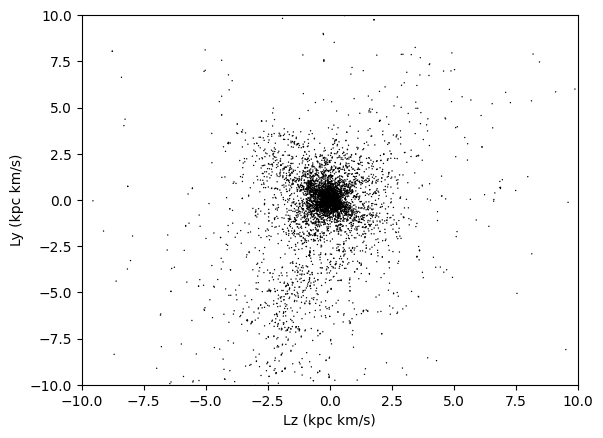

In [474]:
# compute the angular momenta
# this needs to be changed to galactocentric!
Lx = (cartesian_coords.y * cartesian_velocity.d_z - cartesian_coords.z * cartesian_velocity.d_y)
Ly = (cartesian_coords.z * cartesian_velocity.d_x - cartesian_coords.x * cartesian_velocity.d_z)
Lz = (cartesian_coords.x * cartesian_velocity.d_y - cartesian_coords.y * cartesian_velocity.d_x)

plt.scatter(Lz/1000,Ly/1000, edgecolor='none', facecolor='black', s=1)
plt.axis([-10,10,-10,10])
plt.xlabel('Lz (kpc km/s)')
plt.ylabel('Ly (kpc km/s)')

Text(0, 0.5, 'b')

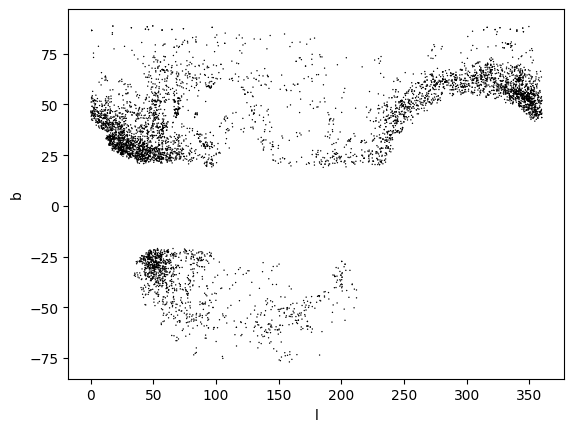

In [475]:
plt.scatter(hdul[3].data['L'], hdul[3].data['B'], edgecolor='none', facecolor='black', s=1)
plt.xlabel('l')
plt.ylabel('b')

Text(0, 0.5, 'radial velocity (heliocentric)')

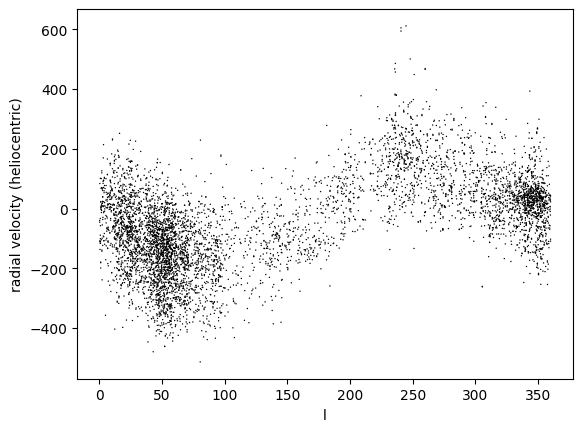

In [476]:
plt.scatter(hdul[3].data['L'], hdul[1].data['VRAD'], edgecolor='none', facecolor='black', s=1)
plt.xlabel('l')
plt.ylabel('radial velocity (heliocentric)')

In [477]:
#cats = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'l','b','d','vlos','mul','mub','d_err','vlos_err','mul_err','mub_err','pm_corr']


In [478]:
# now let's make a pandas dataframe with all the stuff we want
# and save to a simple csv format

distance_error_rate = 0.1 # assume 10% distance error

#coords_gal.pm_l_cosb,coords_gal.pm_b,pm_l_cosb_err,pm_b_err,pml_pmb_corr

DF = pd.DataFrame({'x':np.array(cartesian_coords.x)[main_sel], 'y':np.array(cartesian_coords.y)[main_sel], 'z':np.array(cartesian_coords.z)[main_sel], \
                   'vx':np.array(cartesian_velocity.d_x)[main_sel], 'vy':np.array(cartesian_velocity.d_y)[main_sel], 'vz':np.array(cartesian_velocity.d_z)[main_sel],
                   'l':np.array(hdul[3].data['L']).astype(float)[main_sel],'b':np.array(hdul[3].data['B']).astype(float)[main_sel],'d':np.array(hdul[2].data['DIST']).astype(float)[main_sel],'vlos':np.array(hdul[1].data['VRAD']).astype(float)[main_sel],\
                   'mul':np.array(coords_gal.pm_l_cosb).astype(float)[main_sel],'mub':np.array(coords_gal.pm_b).astype(float)[main_sel],\
                   'd_err':distance_error_rate*np.array(hdul[2].data['DIST']).astype(float)[main_sel],'vlos_err':np.array(hdul[1].data['VRAD_ERR']).astype(float)[main_sel],\
                   'mul_err':np.array(pm_l_cosb_err).astype(float)[main_sel],'mub_err':np.array(pm_b_err).astype(float)[main_sel],\
                   'pm_corr':np.array(pml_pmb_corr).astype(float)[main_sel],\
                   'TEFF': np.array(hdul[1].data['TEFF']).astype(float)[main_sel], \
                   'LOGG': np.array(hdul[1].data['LOGG']).astype(float)[main_sel], \
                    'FEH': np.array(hdul[1].data['FEH']).astype(float)[main_sel], \
                    'RA':np.array(hdul[3].data['RA']).astype(float)[main_sel],\
                    'DEC': np.array(hdul[3].data['DEC']).astype(float)[main_sel],\
                        'ID':np.array(hdul[3].data['SOURCE_ID']).astype(int)[main_sel]})


print(DF)
DF.to_csv('Bystrom_2025_BHB.csv')


             x          y          z          vx          vy          vz  \
0    -5.096159  -4.716491  12.414987   -2.819866   16.550043   21.212508   
1     6.039740 -10.661568  38.089177 -175.390080  -40.508913  -76.227430   
2    -5.173729  -3.411740  10.645883 -152.101426   80.300860 -174.296836   
3    -2.585525  -3.288671  13.040495   56.237669 -140.143455  -42.238615   
4    -4.690821  -4.653657  14.842598   56.301906 -223.542007  219.095459   
...        ...        ...        ...         ...         ...         ...   
5436 -4.202936  11.264398  15.745023  -57.220324  -65.891611   28.550179   
5437 -5.877823   6.235391   8.895775    0.592231    9.021808    6.898116   
5438 -1.153705  11.077650  10.406867  124.658629  215.771818   16.635473   
5439 -2.517747   8.772101   8.183654   13.858161  -32.826653 -100.112491   
5440 -0.621343  11.169792  10.334560 -139.331452  -76.194398  147.380676   

               l          b          d        vlos  ...  vlos_err   mul_err  \
0     30

# Try to find the same satellite data

Pace, Erkal, Li (2022):

Get all EDR3 source ids that could plausibly be associated with a dwarf galaxy.

In [479]:
import glob
import csv
sats = glob.glob('satellites/share_v2/catalogs/*.dat')
print(sats)

# Define the header for the satellite files
header = [
    "source_id", "ra", "dec", "phot_g_mean_mag", "phot_rp_mean_mag", "phot_bp_mean_mag", "ebv",
    "pmra", "pmra_error", "pmdec", "pmdec_error", "pmra_pmdec_corr", "mem_fixed", "mem_fixed_em",
    "mem_fixed_ep", "mem_gauss", "mem_gauss_em", "mem_gauss_ep"
]


# Pass the header to read_csv
allsources = []
for satfile in sats:
    with open(satfile, 'r') as f:
        lines = f.readlines()
    source_ids = [int(line.split(' ')[0]) for line in lines if not line.startswith('#') and line.strip()]
    #sat['source_id'] = source_ids
    #print(sat['source_id'].values)
    allsources.extend(source_ids)

allsources = np.array(allsources)
print(allsources.size)




['satellites/share_v2/catalogs/horologium_2.dat', 'satellites/share_v2/catalogs/bootes_4.dat', 'satellites/share_v2/catalogs/horologium_1.dat', 'satellites/share_v2/catalogs/coma_berenices_1.dat', 'satellites/share_v2/catalogs/draco_1.dat', 'satellites/share_v2/catalogs/bootes_3.dat', 'satellites/share_v2/catalogs/antlia_2.dat', 'satellites/share_v2/catalogs/bootes_2.dat', 'satellites/share_v2/catalogs/hercules_1.dat', 'satellites/share_v2/catalogs/ursa_minor_1.dat', 'satellites/share_v2/catalogs/draco_2.dat', 'satellites/share_v2/catalogs/columba_1.dat', 'satellites/share_v2/catalogs/reticulum_2.dat', 'satellites/share_v2/catalogs/reticulum_3.dat', 'satellites/share_v2/catalogs/sextans_1.dat', 'satellites/share_v2/catalogs/pegasus_3.dat', 'satellites/share_v2/catalogs/bootes_1.dat', 'satellites/share_v2/catalogs/leo_5.dat', 'satellites/share_v2/catalogs/hydrus_1.dat', 'satellites/share_v2/catalogs/leo_4.dat', 'satellites/share_v2/catalogs/ursa_major_2.dat', 'satellites/share_v2/catalo

In [480]:
DF = DF[~DF['ID'].isin(allsources)]
DF.to_csv('Bystrom_2025_BHB.csv')


In [481]:
DF

,x,y,z,vx,vy,vz,l,b,d,vlos,...,vlos_err,mul_err,mub_err,pm_corr,TEFF,LOGG,FEH,RA,DEC,ID
0,-5.096159,-4.716491,12.414987,-2.819866,16.550043,21.212508,302.407986,65.750343,13.602084,88.165282,...,1.040093,0.079822,0.072107,-0.328876,8432.076979,3.330755,-3.211091,192.644024,2.879470,3702977354999642368
1,6.039740,-10.661568,38.089177,-175.390080,-40.508913,-76.227430,322.835783,65.148272,41.993148,-67.014912,...,6.305192,0.294469,0.235668,-0.505794,7661.045565,3.347451,-3.242423,201.101503,3.558370,3712654839735305472
2,-5.173729,-3.411740,10.645883,-152.101426,80.300860,-174.296836,310.569413,67.100110,11.542292,-160.894235,...,0.736532,0.060198,0.054560,-0.327219,8106.394073,3.386656,-2.854049,195.832717,4.404886,3704842706539889792
3,-2.585525,-3.288671,13.040495,56.237669,-140.143455,-42.238615,329.137536,63.809051,14.525153,59.021278,...,1.103175,0.054466,0.045796,-0.428023,7406.408947,3.314867,-1.637962,204.116943,3.252312,3712067429942889984
4,-4.690821,-4.653657,14.842598,56.301906,-223.542007,219.095459,306.097754,68.776610,15.909589,343.454473,...,1.783890,0.093738,0.090186,-0.468182,11762.574734,4.086154,-3.999988,194.011192,5.933183,3706039701041488768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5436,-4.202936,11.264398,15.745023,-57.220324,-65.891611,28.550179,70.999474,52.867919,19.735670,-175.163781,...,1.187224,0.080285,0.065609,-0.396591,7942.157612,3.349983,-1.769189,234.219638,44.010598,1391510339514176000
5437,-5.877823,6.235391,8.895775,0.592231,9.021808,6.898116,70.391084,53.300687,11.076168,-136.383331,...,0.925315,0.048721,0.041060,-0.303178,12066.324468,4.027190,-3.999986,233.748953,43.557446,1391473407091477632
5438,-1.153705,11.077650,10.406867,124.658629,215.771818,16.635473,57.927319,38.513899,16.707528,32.339400,...,1.003627,0.065018,0.050495,0.019101,7745.751131,3.376619,-2.366298,253.224440,35.323640,1315029998609816320
5439,-2.517747,8.772101,8.183654,13.858161,-32.826653,-100.112491,57.523920,38.181455,13.228352,-250.804299,...,0.621104,0.039525,0.032435,-0.121295,7501.567711,3.177910,-2.102746,253.566491,34.959808,1314960385779711232


In [482]:
import numpy as np
from scipy.interpolate import interp1d, splrep, BSpline

def compute_Lambda(ra, dec):
    """ Computes the Sgr coordinate longitude Lambda """
    return np.rad2deg(np.arctan2(-0.93595354*np.cos(np.deg2rad(ra))*np.cos(np.deg2rad(dec)) - 0.31910658*np.sin(np.deg2rad(ra))*np.cos(np.deg2rad(dec)) + 0.14886895*np.sin(np.deg2rad(dec)), 0.21215555*np.cos(np.deg2rad(ra))*np.cos(np.deg2rad(dec)) - 0.84846291*np.sin(np.deg2rad(ra))*np.cos(np.deg2rad(dec)) - 0.48487186*np.sin(np.deg2rad(dec))))

def compute_Beta(ra, dec):
    """ Computes the Sgr coordinate latitude Beta """
    return np.rad2deg(np.arcsin(0.28103559*np.cos(np.deg2rad(ra))*np.cos(np.deg2rad(dec)) - 0.42223415*np.sin(np.deg2rad(ra))*np.cos(np.deg2rad(dec)) + 0.86182209*np.sin(np.deg2rad(dec))))

def smooth_splines(x, y):
    """ Smoothing functions """
    tck_s = splrep(x, y, s=len(x))
    return BSpline(*tck_s)(x)


beta_lim = 15

def select_Sgr_leadarm(Beta, Lambda, distance):
    """ This function creates a boolean array where True means that a star belongs to Sgr leading arm """
    
    HernitschekDleadarm = [28.83, 14.3, 34.14, 36.65, 45.94, 50.5, 52.59, 49.19, 46.22, 40.59, 34.8, 31.19, 25.9, 21.34, 19.66, 16.2]
    HernitschekDsigleadarm = [1.621, 2.8, 2.8, 4.1, 3.68, 3.33, 4.52, 3.75, 4.66, 3.88, 6.3, 3.08, 5.0, 2.7, 2.05, 3.4]
    Lambdabinleadarm = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155]
    
    leadarm_func = interp1d(Lambdabinleadarm, HernitschekDleadarm)
    leadarmsig_func = interp1d(Lambdabinleadarm, HernitschekDsigleadarm)
    
    x = np.arange(np.min(Lambdabinleadarm), np.max(Lambdabinleadarm) + .1, .1)
    leadarmsmooth_func = interp1d(x, smooth_splines(x, leadarm_func(x)))
    leadarmsigsmooth_func = interp1d(x, smooth_splines(x, leadarmsig_func(x)))
    
    Lambdashift = np.array([(e+360) if (e < 0) else e for e in Lambda])
    interp_range = (Lambdashift < np.max(x)) & (Lambdashift > np.min(x))
    
    Sgrleadarmdist_idx = np.array(np.zeros(len(Lambdashift)), dtype=bool)
    for i in range(len(Lambdashift)):
        if interp_range[i] == True:
            d = distance[i]
            dlower = leadarmsmooth_func(Lambdashift[i]) - 3*leadarmsigsmooth_func(Lambdashift[i])
            dupper = leadarmsmooth_func(Lambdashift[i]) + 3*leadarmsigsmooth_func(Lambdashift[i])
            if (d > dlower) & (d < dupper):
                Sgrleadarmdist_idx[i] = True
    
    Sgrcoord_idx = np.abs(Beta) < beta_lim

    return (Sgrleadarmdist_idx & Sgrcoord_idx)

def select_Sgr_trailarm(Beta, Lambda, distance):
    """ This function creates a boolean array where True means that a star belongs to Sgr trailing arm """
    
    HernitschekDtrailarm = [55.4, 62.3, 57.2, 66.9, 81.3, 83.1, 89.02, 92.98, 86.7, 60, 53, 43.15, 36.55, 31.17, 28.41, 25.57, 24.7, 18, 20.34, 21.2, 20.8, 21.66, 22, 20.1, 19.7, 27.605]
    HernitschekDsigtrailarm = [3.2, 3.5, 2.3, 5.8, 6.1, 5.2, 5.13, 8.99, 10.5, 2.8, 6.78, 6.65, 6.28, 6.16, 4.66, 5.14, 4.86, 7.7, 4.44, 4.7, 5.17, 4.84, 4.41, 5.3, 6.43, 1.245]
    Lambdabintrailarm = [105, 115, 125, 135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255, 265, 275, 285, 295, 305, 315, 325, 335, 345, 355]
    
    trailarm_func = interp1d(Lambdabintrailarm, HernitschekDtrailarm)
    trailarmsig_func = interp1d(Lambdabintrailarm, HernitschekDsigtrailarm)
    
    x = np.arange(np.min(Lambdabintrailarm), np.max(Lambdabintrailarm) + .1, .1)
    trailarmsmooth_func = interp1d(x, smooth_splines(x, trailarm_func(x)))
    trailarmsigsmooth_func = interp1d(x, smooth_splines(x, trailarmsig_func(x)))
    
    Lambdashift = np.array([(e+360) if (e < 0) else e for e in Lambda])
    interp_range = (Lambdashift < np.max(x)) & (Lambdashift > np.min(x))
    
    Sgrtrailarmdist_idx = np.array(np.zeros(len(Lambdashift)), dtype=bool)
    for i in range(len(Lambdashift)):
        if interp_range[i] == True:
            d = distance[i]
            dlower = trailarmsmooth_func(Lambdashift[i]) - 3*trailarmsigsmooth_func(Lambdashift[i])
            dupper = trailarmsmooth_func(Lambdashift[i]) + 3*trailarmsigsmooth_func(Lambdashift[i])
            if (d > dlower) & (d < dupper):
                Sgrtrailarmdist_idx[i] = True
    
    Sgrcoord_idx = np.abs(Beta) < beta_lim

    return (Sgrtrailarmdist_idx & Sgrcoord_idx)

def select_Sgr(ra, dec, distance):
    """This function combines stars in both the leading and the trailing arm of the Sgr stream."""
    
    Lambda = compute_Lambda(ra, dec)
    Beta = compute_Beta(ra, dec)

    Sgr_leadarm = select_Sgr_leadarm(Beta, Lambda, distance)
    Sgr_trailarm = select_Sgr_trailarm(Beta, Lambda, distance)

    Sgr_flag = Sgr_leadarm | Sgr_trailarm

    return Sgr_flag

In [483]:
DF

,x,y,z,vx,vy,vz,l,b,d,vlos,...,vlos_err,mul_err,mub_err,pm_corr,TEFF,LOGG,FEH,RA,DEC,ID
0,-5.096159,-4.716491,12.414987,-2.819866,16.550043,21.212508,302.407986,65.750343,13.602084,88.165282,...,1.040093,0.079822,0.072107,-0.328876,8432.076979,3.330755,-3.211091,192.644024,2.879470,3702977354999642368
1,6.039740,-10.661568,38.089177,-175.390080,-40.508913,-76.227430,322.835783,65.148272,41.993148,-67.014912,...,6.305192,0.294469,0.235668,-0.505794,7661.045565,3.347451,-3.242423,201.101503,3.558370,3712654839735305472
2,-5.173729,-3.411740,10.645883,-152.101426,80.300860,-174.296836,310.569413,67.100110,11.542292,-160.894235,...,0.736532,0.060198,0.054560,-0.327219,8106.394073,3.386656,-2.854049,195.832717,4.404886,3704842706539889792
3,-2.585525,-3.288671,13.040495,56.237669,-140.143455,-42.238615,329.137536,63.809051,14.525153,59.021278,...,1.103175,0.054466,0.045796,-0.428023,7406.408947,3.314867,-1.637962,204.116943,3.252312,3712067429942889984
4,-4.690821,-4.653657,14.842598,56.301906,-223.542007,219.095459,306.097754,68.776610,15.909589,343.454473,...,1.783890,0.093738,0.090186,-0.468182,11762.574734,4.086154,-3.999988,194.011192,5.933183,3706039701041488768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5436,-4.202936,11.264398,15.745023,-57.220324,-65.891611,28.550179,70.999474,52.867919,19.735670,-175.163781,...,1.187224,0.080285,0.065609,-0.396591,7942.157612,3.349983,-1.769189,234.219638,44.010598,1391510339514176000
5437,-5.877823,6.235391,8.895775,0.592231,9.021808,6.898116,70.391084,53.300687,11.076168,-136.383331,...,0.925315,0.048721,0.041060,-0.303178,12066.324468,4.027190,-3.999986,233.748953,43.557446,1391473407091477632
5438,-1.153705,11.077650,10.406867,124.658629,215.771818,16.635473,57.927319,38.513899,16.707528,32.339400,...,1.003627,0.065018,0.050495,0.019101,7745.751131,3.376619,-2.366298,253.224440,35.323640,1315029998609816320
5439,-2.517747,8.772101,8.183654,13.858161,-32.826653,-100.112491,57.523920,38.181455,13.228352,-250.804299,...,0.621104,0.039525,0.032435,-0.121295,7501.567711,3.177910,-2.102746,253.566491,34.959808,1314960385779711232


In [484]:
DF['sgr'] = select_Sgr(DF['RA'].values, DF['DEC'].values, DF['d'].values)
DF['r'] = np.sqrt(DF['x'].values**2 + DF['y'].values**2 + DF['z'].values**2)

DF['Lx'] = (DF['y'] * DF['vz'] - DF['z'] * DF['vy'])
DF['Ly'] = (DF['z'] * DF['vx'] - DF['x'] * DF['vz'])
DF['Lz'] = (DF['x'] * DF['vy'] - DF['y'] * DF['vx'])
DF['l'][DF['l']>180.] -= 360.

sgrcen = [605, -4515, -1267]
sgrballcut = 3000
criteria = (np.sqrt((DF['Lx']-sgrcen[0])**2 + (DF['Ly']-sgrcen[1])**2 + (DF['Lz']-sgrcen[2])**2) < sgrballcut)
DF['Sgrball'] = criteria

/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_2816/3491478003.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  DF['l'][DF['l']>180.] -= 360.
/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_2816/3491478003.py:7: Set

In [485]:
DF

,x,y,z,vx,vy,vz,l,b,d,vlos,...,FEH,RA,DEC,ID,sgr,r,Lx,Ly,Lz,Sgrball
0,-5.096159,-4.716491,12.414987,-2.819866,16.550043,21.212508,-57.592014,65.750343,13.602084,88.165282,...,-3.211091,192.644024,2.879470,3702977354999642368,False,14.224908,-305.517162,73.093712,-97.641513,False
1,6.039740,-10.661568,38.089177,-175.390080,-40.508913,-76.227430,-37.164217,65.148272,41.993148,-67.014912,...,-3.242423,201.101503,3.558370,3712654839735305472,True,40.011660,2355.655049,-6220.069971,-2114.596494,True
2,-5.173729,-3.411740,10.645883,-152.101426,80.300860,-174.296836,-49.430587,67.100110,11.542292,-160.894235,...,-2.854049,195.832717,4.404886,3704842706539889792,False,12.318372,-260.218037,-2521.018697,-934.385493,True
3,-2.585525,-3.288671,13.040495,56.237669,-140.143455,-42.238615,-30.862464,63.809051,14.525153,59.021278,...,-1.637962,204.116943,3.252312,3712067429942889984,False,13.695065,1966.448967,624.158037,547.291656,False
4,-4.690821,-4.653657,14.842598,56.301906,-223.542007,219.095459,-53.902246,68.776610,15.909589,343.454473,...,-3.999988,194.011192,5.933183,3706039701041488768,False,16.246939,2298.349003,1863.404165,1310.605334,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5436,-4.202936,11.264398,15.745023,-57.220324,-65.891611,28.550179,70.999474,52.867919,19.735670,-175.163781,...,-1.769189,234.219638,44.010598,1391510339514176000,False,19.810529,1359.065474,-780.940721,921.490716,False
5437,-5.877823,6.235391,8.895775,0.592231,9.021808,6.898116,70.391084,53.300687,11.076168,-136.383331,...,-3.999986,233.748953,43.557446,1391473407091477632,False,12.351669,-37.243534,45.814257,-56.721387,False
5438,-1.153705,11.077650,10.406867,124.658629,215.771818,16.635473,57.927319,38.513899,16.707528,32.339400,...,-2.366298,253.224440,35.323640,1315029998609816320,False,15.242974,-2061.226657,1316.498210,-1629.861834,False
5439,-2.517747,8.772101,8.183654,13.858161,-32.826653,-100.112491,57.523920,38.181455,13.228352,-250.804299,...,-2.102746,253.566491,34.959808,1314960385779711232,False,12.258099,-609.554875,-138.647487,-38.915988,False


In [486]:
DF['sigmavlos'] = (DF['vlos'] - np.nanmean(DF['vlos']))/np.nanstd(DF['vlos'])
vlossigma = DF['sigmavlos'].values
print(vlossigma[np.abs(vlossigma)>3].size)

9


In [487]:
# make sure there are no NaNs in the file (these are stars not matched against Gaia)
DF = DF.dropna(how='any')

In [493]:
DFS = DF[(~DF['sgr']) & (DF['r'] > 50) & (np.abs(DF['sigmavlos']) < 3)]

# PP21 cut
#DFS = DF[(~DF['Sgrball']) & (DF['r'] > 40) & (np.abs(DF['sigmavlos']) < 3)]

DFS

,x,y,z,vx,vy,vz,l,b,d,vlos,...,RA,DEC,ID,sgr,r,Lx,Ly,Lz,Sgrball,sigmavlos
9,4.088650,-17.113692,54.230768,-26.014817,-10.034968,8.795479,-54.801060,68.888043,58.143774,68.016448,...,193.680400,6.030748,3706243724871929216,False,57.013786,393.680932,-1446.765131,-486.239028,False,0.873782
26,2.928395,-23.520137,61.237500,101.371684,213.314378,-45.402488,-65.148069,67.060702,66.504074,-22.835435,...,189.709878,4.386805,3707149207057231360,False,65.664326,-11994.966387,6340.704843,3008.944682,False,0.261772
58,23.368762,37.132393,25.817563,143.731100,267.010649,-147.924967,49.759325,28.011285,55.099491,16.303455,...,263.227588,26.206751,4594808514941397120,False,50.906386,-12386.372157,7167.609970,902.628513,False,0.525425
194,41.607188,12.943641,41.112286,10.804015,234.414349,13.826690,14.619146,38.789894,65.795422,-0.008316,...,240.733777,3.881614,4425361472314573824,False,59.907562,-9458.342106,-131.111929,9613.478501,False,0.415544
266,39.370806,15.293485,29.438832,113.742550,145.889572,-86.017476,17.876136,30.663390,57.921286,8.719349,...,249.073762,1.930680,4432166521578294912,False,51.483938,-5610.325575,6735.025168,4004.270040,False,0.474336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,-5.653904,-1.776602,53.709910,-207.312695,33.796438,-29.351013,-37.316275,86.876079,53.775163,-40.181016,...,194.016268,24.183427,3956947734807830016,False,54.035889,-1763.058585,-11300.693939,-559.393894,False,0.144926
5405,-8.404974,56.792726,33.356554,14.168207,101.185266,-284.294188,90.371628,30.410515,65.854129,-272.398693,...,268.471984,61.368692,1435483451641197184,False,66.398170,-19521.033743,-1916.882543,-1655.110614,False,-1.419374
5407,-3.730008,39.048035,40.191764,-26.884638,-31.727361,-32.054931,83.731679,45.648214,56.193814,-224.295664,...,241.470471,53.919618,1428892016871609088,False,56.160839,23.496497,-1200.106150,1168.135572,False,-1.095335
5408,-3.197675,-24.235944,46.953730,330.449800,231.558564,49.623375,-78.787847,62.242106,53.050256,72.909160,...,182.933072,1.056496,3699279315142445696,False,52.936366,-12075.207657,15674.530227,7268.313650,False,0.906741


In [494]:
DFS.to_csv('Bystrom_2025_BHB_sample.csv')

In [495]:
DFS.head()

,x,y,z,vx,vy,vz,l,b,d,vlos,...,RA,DEC,ID,sgr,r,Lx,Ly,Lz,Sgrball,sigmavlos
9,4.088650,-17.113692,54.230768,-26.014817,-10.034968,8.795479,-54.801060,68.888043,58.143774,68.016448,...,193.680400,6.030748,3706243724871929216,False,57.013786,393.680932,-1446.765131,-486.239028,False,0.873782
26,2.928395,-23.520137,61.237500,101.371684,213.314378,-45.402488,-65.148069,67.060702,66.504074,-22.835435,...,189.709878,4.386805,3707149207057231360,False,65.664326,-11994.966387,6340.704843,3008.944682,False,0.261772
58,23.368762,37.132393,25.817563,143.731100,267.010649,-147.924967,49.759325,28.011285,55.099491,16.303455,...,263.227588,26.206751,4594808514941397120,False,50.906386,-12386.372157,7167.609970,902.628513,False,0.525425
194,41.607188,12.943641,41.112286,10.804015,234.414349,13.826690,14.619146,38.789894,65.795422,-0.008316,...,240.733777,3.881614,4425361472314573824,False,59.907562,-9458.342106,-131.111929,9613.478501,False,0.415544
266,39.370806,15.293485,29.438832,113.742550,145.889572,-86.017476,17.876136,30.663390,57.921286,8.719349,...,249.073762,1.930680,4432166521578294912,False,51.483938,-5610.325575,6735.025168,4004.270040,False,0.474336


In [496]:
# wrap DFS l: this seems to be important for the classification, but I'm not sure why
DFS['l'][DFS['l']>180.] -= 360.

/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_2816/2177479120.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  DFS['l'][DFS['l']>180.] -= 360.
/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_2816/2177479120.py:2: S

In [497]:
# now convert to the format we need for the analysis

rows = ['x','y','z','vx','vy','vz','l','b','d','vlos','mul','mub','d_err','vlos_err','mul_err','mub_err','pm_corr']

f = open('/Users/mpetersen/Code/reflexcalc/processed_real/sgrtests/BHB_dr3_DESI_50+.txt','w')
for row in rows:
    for entry in DFS[row]:
        f.write(str(entry)+' ')
    f.write('\n')

f.close()


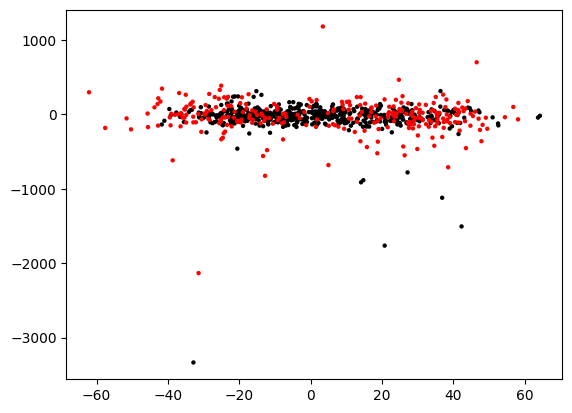

In [402]:
A = np.genfromtxt('/Users/mpetersen/Notebooks/Dynamics/ReflexMotion/data/observations/DR3/KGiant_YPP24sgr_40+.txt',delimiter=' ')
plt.scatter(A[1],A[4], edgecolor='none', facecolor='black', s=10)

plt.scatter(DFS['y'],DFS['vy'], edgecolor='none', facecolor='red', s=10)

/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_2816/1399760230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Lx'] = (DF['y'] * DF['vz'] - DF['z'] * DF['vy'])
/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_2816/1399760230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Ly'] = (DF['z'] * DF['vx'] - DF['x'] * DF['vz'])
/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_2816/1399760230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

nocuts  1051
ballcuts  918
poscuts  495


(-20.0, 20.0, -20.0, 20.0)

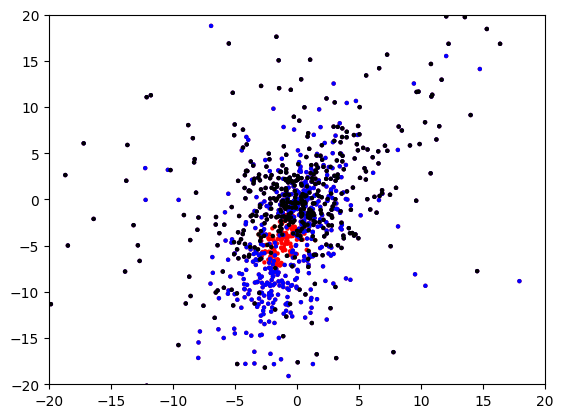

In [328]:

# the background sample
DFS2 = DF[(DF['r'] > 40) & (np.abs(DF['sigmavlos']) < 3)]
plt.scatter(DFS2['Lz']/1000,DFS2['Ly']/1000, edgecolor='none', facecolor='red', s=10)
print('nocuts ',DFS2['Lz'].size)

# what is kept when doing the Sgr ball cut
DFS3 = DF[(~DF['Sgrball']) & (DF['r'] > 40) & (np.abs(DF['sigmavlos']) < 3)]
plt.scatter(DFS3['Lz']/1000,DFS3['Ly']/1000, edgecolor='none', facecolor='blue', s=10)
print('ballcuts ',DFS3['Lz'].size)

# what is kept when doing the B25 cut
DFS = DF[(~DF['sgr']) & (DF['r'] > 40) & (np.abs(DF['sigmavlos']) < 3)]
plt.scatter(DFS['Lz']/1000,DFS['Ly']/1000, edgecolor='none', facecolor='black', s=10)
print('poscuts ',DFS['Lz'].size)


plt.axis([-20,20,-20,20])


/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_2816/3841261922.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  DFS2['l'][DFS2['l']>180.] -= 360.
/var/folders/6w/dlp9742d17v7x08hrlbn3d0r0000gn/T/ipykernel_2816/3841261922.py:2:

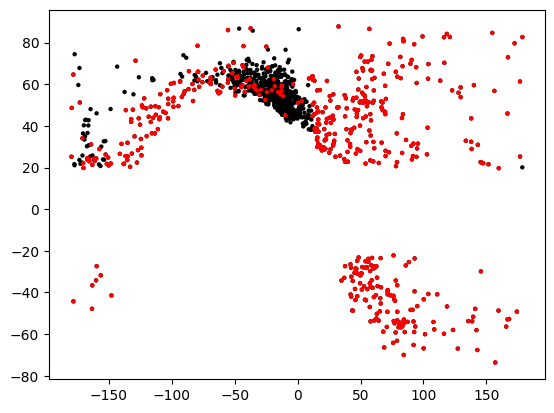

In [ ]:

DFS2 = DF[(DF['r'] > 40) & (np.abs(DF['sigmavlos']) < 3)]
DFS2['l'][DFS2['l']>180.] -= 360.

# with Sgr in it
plt.scatter(DFS2['l'],DFS2['b'], edgecolor='none', facecolor='black', s=10)

# without Sgr in it
plt.scatter(DFS['l'],DFS['b'], edgecolor='none', facecolor='red', s=10)


In [27]:
# Define the column widths and names
column_specs = [(0, 12), (13, 22), (25, 31), (33, 39), (41, 47), (49, 55), (57, 63), (65, 71), (73, 79), (81, 87), (89, 95), (97, 103), (105, 109)]
column_names = ['Cluster', 'Alias', 'RA', 'Dec', 'pmRA', 'pmRA_err', 'pmDec', 'pmDec_err', 'corr', 'parallax', 'parallax_err', 'Rscale', 'Nstar']

# Read the fixed-width file
df_fwf = pd.read_fwf('GCs_VB21.txt', colspecs=column_specs, names=column_names)

# Display the dataframe
print(df_fwf)

       Cluster  Alias      RA     Dec   pmRA  pmRA_err  pmDec  pmDec_err  \
0      NGC 104  7 Tuc   6.024  72.081  5.252     0.021 -2.551      0.021   
1      NGC 288    NaN  13.188  26.583  4.164     0.024 -5.705      0.024   
2      NGC 362    NaN  15.809  70.849  6.694     0.025 -2.535      0.024   
3    Whiting 1    NaN  30.737  -3.253 -0.228     0.065 -2.046      0.056   
4     NGC 1261    NaN  48.068  55.216  1.596     0.025 -2.064      0.025   
..         ...    ...     ...     ...    ...       ...    ...        ...   
165   NGC 7089      2  23.363  -0.823  3.435     0.025 -2.159      0.024   
166   NGC 7099     30  25.092  23.180 -0.737     0.025 -7.299      0.024   
167     Pal 12    NaN  26.662  21.253 -3.220     0.029 -3.333      0.028   
168     Pal 13    NaN  46.685  12.772  1.748     0.049  0.104      0.047   
169   NGC 7492    NaN  47.111  15.611  0.756     0.028 -2.320      0.028   

     corr  parallax  parallax_err  Rscale  Nstar  
0    0.00     0.232         0.009   

In [28]:
from astropy.coordinates import SkyCoord
from astropy import units as u

DF = DF.dropna(how='any')

# Create SkyCoord objects for both dataframes
coords_DF = SkyCoord(ra=DF['RA'].values * u.deg, dec=DF['DEC'].values * u.deg)
coords_fwf = SkyCoord(ra=df_fwf['RA'].values * u.deg, dec=df_fwf['Dec'].values * u.deg)

# Match the coordinates with a maximum separation (e.g., 1 arcsecond)
idx, d2d, _ = coords_DF.match_to_catalog_sky(coords_fwf)
max_sep = 1 * u.arcsec
matches = d2d < max_sep

# Extract matched rows
matched_DF = DF[matches]
matched_fwf = df_fwf.iloc[idx[matches]]

# Display the matched data
print(matched_DF)
print(matched_fwf)

Empty DataFrame
Columns: [x, y, z, vx, vy, vz, l, b, d, vlos, mul, mub, d_err, vlos_err, mul_err, mub_err, pm_corr, TEFF, LOGG, FEH, RA, DEC, ID, sgr, r, sigmavlos]
Index: []

[0 rows x 26 columns]
Empty DataFrame
Columns: [Cluster, Alias, RA, Dec, pmRA, pmRA_err, pmDec, pmDec_err, corr, parallax, parallax_err, Rscale, Nstar]
Index: []
